In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from autograd import elementwise_grad as egrad

from rates_2D import ratesSS, PS, PS_ratesSS, r_SS 

# Can train on V's with small enough eta

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])
W = np.reshape(params[:4], (2,2))

ideal_v, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])

In [3]:
def loss(params):
    vv, _ = ratesSS(params[0], params[1],params[2], params[3], params[4])
#     ll = np.mean((vv-ideal_v)**2)
    ll = np.mean((vv-ideal_v)**2) + np.abs(1000*np.sum(np.minimum(params, np.zeros(len(params)))))
    
    return ll

In [4]:
# d_loss = grad(loss)
# d_loss(params)

params = np.array([Jee, Jei , Jie, Jii, i2e+ 0.1])
eta = 0.0005
t_params = params

orig_loss = loss(params)
new_loss = orig_loss

t_loss = orig_loss
t = 0



In [5]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params)
    params = params - eta*d_params
    
    params = np.maximum(params, np.zeros(len(params)))
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

In [6]:
params

array([1.70067499, 1.51388684, 1.6984595 , 0.52069624, 0.61188115])

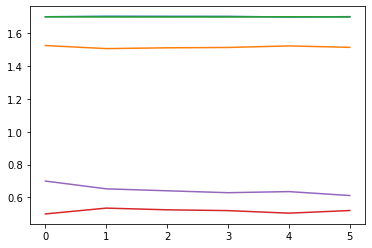

In [7]:
plt.plot(t_params)

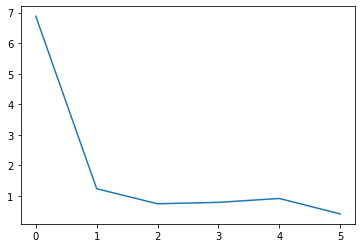

In [8]:
plt.plot(t_loss)


# Will autograd work on Spectra? Yes

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])

v1, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])
ideal_spect = np.real(PS(params, v1))

In [3]:
# def rect_powerLaw(vv, kk, nn, N, cons):
#     '''This gives the E/I rates given the synaptic inputs vv, and the nonlinear parameters kk, nn'''
#     fv = kk*np.maximum(np.array([np.sum(vv[::2,:], axis=0), np.sum(vv[1::2,:],axis=0)]), np.zeros([N, cons]))**nn
#     return fv

# kk = 0.04
# nn = 2
# N = 2
# cons = 4

# nmdaRatio = 0.1
# Wtot = np.array([[(1-nmdaRatio)*Jee, 0], [(1-nmdaRatio)* Jie, 0], [nmdaRatio * Jee, 0], [nmdaRatio * Jie, 0], [0, -Jei], [0, -Jii]])

# r_starcons = rect_powerLaw(v1, kk, nn, N, cons)
# rs = nn*kk**(1/nn)*r_starcons**(1-1/nn)
# print(rs)

# Phi = lambda rr: np.diag(rr)

# cc = 1
# rcpt_types = 3
# J = np.array([np.kron(np.ones((1, rcpt_types)), Wtot @  Phi(rs[:,cc])) - np.eye(N*rcpt_types) for cc in range(cons)])



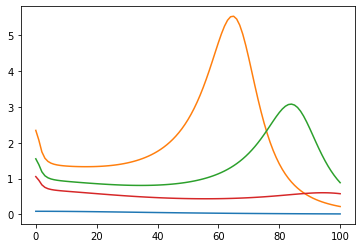

In [4]:
fs = np.arange(101)

plt.plot(fs, np.real(ideal_spect/np.mean(ideal_spect)))

In [5]:
def loss(params, v1):

    spect = PS(params, v1)
    spect = np.real(spect)
    
#     ideal_spect =ideal_spect/np.mean(ideal_spect)

    ll = np.mean((ideal_spect - spect)**2)
    
    return ll 

In [6]:
params = np.array([Jee, Jei +0.1 , Jie, Jii, i2e])
eta = 0.0005
t_params = params

orig_loss = loss(params, v1)
new_loss = orig_loss

t_loss = orig_loss
t = 0

print(orig_loss)

0.07322137943455963


In [7]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params, v1)
    params = params - eta*d_params
    
    params = np.maximum(params, np.zeros(len(params)))
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params, v1)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

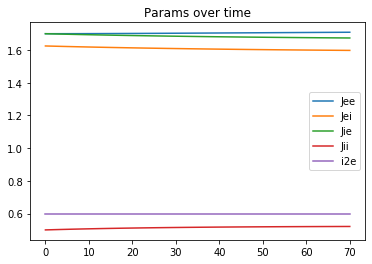

In [8]:
plt.title('Params over time')
plt.plot(t_params)
plt.legend(['Jee', 'Jei', 'Jie', 'Jii', 'i2e'])

Text(0.5, 0, 'time')

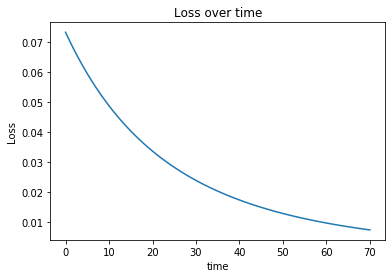

In [9]:
plt.plot(t_loss)
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('time')

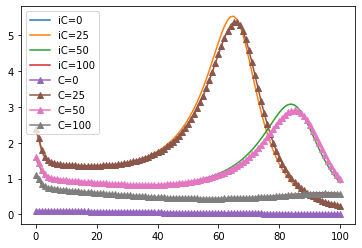

In [11]:
spect = np.real(PS(params, v1))

plt.plot(fs, ideal_spect, fs, spect, '-^')
plt.legend(['iC=0', 'iC=25', 'iC=50', 'iC=100', 'C=0', 'C=25', 'C=50', 'C=100'])

In [12]:
params

array([1.70893116, 1.59791235, 1.6738682 , 0.52107614, 0.6       ])

# Will autograd work on the combination?

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])

# ideal_v, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])
# ideal_spect = np.real(PS(params[0], params[1],params[2], params[3], params[4], ideal_v))

ideal_spect, ideal_v = np.real(PS_ratesSS(params))

/Users/cholt/Google Drive/Python/torch_SSN/jax/jax/lib/xla_bridge.py:109: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


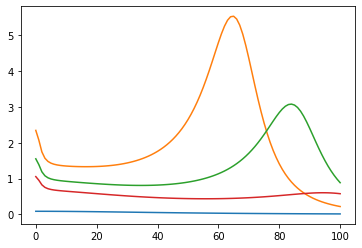

In [3]:
fs = np.arange(101)

plt.plot(fs, np.real(ideal_spect/np.mean(ideal_spect)))

In [6]:
def loss(params):
    
#     v1, _ = ratesSS(params)
#     spect = PS(params, v1)
    
    spect, _ = PS_ratesSS(params)
    spect = np.real(spect)
    
#     ideal_spect =ideal_spect/np.mean(ideal_spect)

    ll = np.mean((np.real(ideal_spect - spect))**2)
    
    return ll 

In [7]:
params = np.array([Jee, Jei +0.1 , Jie, Jii, i2e])
eta = 0.0001
t_params = params

orig_loss = loss(params)
new_loss = orig_loss

t_loss = orig_loss
t = 0

print(orig_loss)

0.075909205


In [8]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params)
    params = params - eta*d_params
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

/Users/cholt/Google Drive/Python/torch_SSN/jax/jax/lax/lax.py:328: ComplexWarning: Casting complex values to real discards the imaginary part
  warnings.warn(msg, onp.ComplexWarning)


KeyboardInterrupt: 

In [16]:
loss(params)

DeviceArray(0.06719249, dtype=float32)

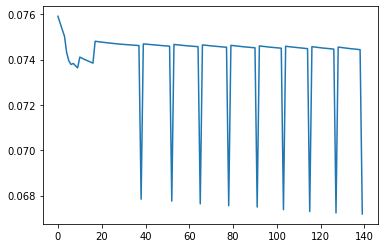

In [17]:
plt.plot(t_loss)

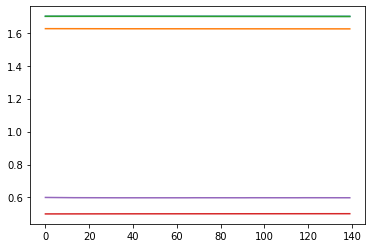

In [21]:
# plt.plot(np.diff(t_params, axis=0))
plt.plot(t_params)

In [13]:
d_params

DeviceArray([-0.0567933 ,  0.15781718,  0.09231025, -0.16706377,
              0.41030812], dtype=float32)

In [3]:
def rect_powerLaw(vv, kk, nn, N, cons):
    '''This gives the E/I rates given the synaptic inputs vv, and the nonlinear parameters kk, nn'''
    fv = kk*np.maximum(np.array([np.sum(vv[::2,:], axis=0), np.sum(vv[1::2,:],axis=0)]), np.zeros([N, cons]))**nn
    return fv

def dvdt(vv, kk, nn, N, rcpt_types, cons, Wtot, I_total, tauSvec, dt):
    '''Evaluates the RHS of the v-eqn'''
    delta_v = np.reshape(dt/tauSvec, [N*rcpt_types,1]) * (-vv + Wtot @ np.kron(np.ones([rcpt_types,1]), rect_powerLaw(vv, kk ,nn, N, cons)) + I_total)
    return delta_v

N = 2
rcpt_types = 3
t = np.arange(0,5000.1, 0.1)
fs = np.arange(0, 101, 1)
fs = fs/1000 #convert from Hz to kHz
c = np.array([0, 25, 50, 100])
cons = len(c)

J0 = np.array([[Jee, -Jei], [Jie, -Jii]])

W = J0
#     print('Det(W) =', '%.3f' % np.linalg.det(W))

#define nonlinearity parameters
kk = 0.04
nn = 2

if rcpt_types > 1:
    g = np.array([1, i2e, 0, 0, 0, 0])
else:
    g = np.array([1, i2e])

tauE = 15
tau_ratio = 1
tauI = tauE/tau_ratio

# tau = np.ones(N)
# tau[:2:] = tauE
# tau[1:2:] = tauI

t_scale = 1
tauNMDA = 100 * t_scale
tauAMPA = 3 * t_scale
tauGABA = 5 * t_scale
nmdaRatio = 0.1 # sets the ratio of NMDA cells to AMPA cell

NoiseNMDAratio = 0
NoiseTau = 1 * t_scale


totalT = t[-1]
dt = np.mean(np.diff(t))
dt2 = np.sqrt(dt)

if rcpt_types > 1:
    tauS = np.array([tauAMPA, tauNMDA, tauGABA])
    tauSvec = np.kron(tauS, np.ones(N))

    Wtot = np.array([[(1-nmdaRatio)*Jee, 0, 0, 0, 0, 0], [(1-nmdaRatio)* Jie, 0, 0, 0, 0, 0], [0, 0, nmdaRatio * Jee, 0, 0, 0], [0, 0, nmdaRatio * Jie, 0, 0, 0], [0, 0, 0, 0, 0, -Jei], [0, 0, 0, 0, 0, -Jii]])

else:
    tauSvec = tau
    Wrcpt = W
    Wtot = W


v1 = np.zeros([N*rcpt_types, cons])
r_starcons = np.zeros([N, cons])

I_total = np.kron( g.reshape(N*rcpt_types,1),  c.reshape(1,cons))
#Conv = True
indt = 0

xtol = 1e-3
xmin = 1

for tt in t:

    dv = dvdt(v1, kk, nn,  N, rcpt_types, cons, Wtot, I_total, tauSvec, dt)
    v1 = dv + v1
#     vv_t[:,:, tt] = v1
    indt += 1

    if np.abs( dv /np.maximum(xmin, np.abs(v1)) ).max() < xtol:
        # print('\n converged to fixed point at t=%g,      as max(abs(dx./max(xvec,%g))) < %g \n' % (n*dt,xmin,xtol))
        # CONVG = 1
        # print(tt)
        break


#         if tt >= totalT - 1000*dt:
#             itr = np.max(np.abs(dv))

#             if itr > 0.01:
#                 Conv = False

r_starcons = rect_powerLaw(v1, kk, nn, N, cons)
rs = nn*kk**(1/nn)*r_starcons**(1-1/nn)

Phi = lambda rr: np.diag(rr)
eE = np.array([[1], [0]])
eE = np.kron(np.ones([rcpt_types,1]), eE)
J = np.array([Wtot @ np.kron(np.ones([rcpt_types, rcpt_types]), Phi(rs[:,cc])) -np.eye(N*rcpt_types) for cc in range(cons)])
Gf = np.array([-1j * 2 * np.pi * ff * np.diag(np.kron(tauS, np.ones(N))) - J[cc] for cc in range(cons) for ff in fs])

cuE = np.array([eE for cc in range(cons) for ff in fs])
fscons = np.kron(np.ones([1, cons]), fs)

In [14]:
x = np.linalg.solve(Gf, cuE)

In [15]:
x.shape

(404, 6, 1)

# R - formulation

In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt
from jax import grad

from rates_2D import ratesSS, PS, PS_ratesSS, r_SS 

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])

# ideal_v, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])
# ideal_spect = np.real(PS(params[0], params[1],params[2], params[3], params[4], ideal_v))

ideal_r, r_t = r_SS(params)
ideal_spect = PS(params, ideal_r)


/Users/cholt/Google Drive/Python/torch_SSN/jax/jax/lib/xla_bridge.py:109: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


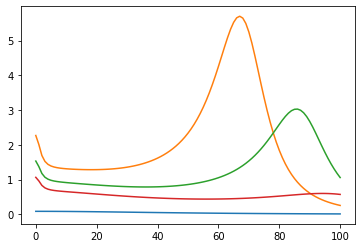

In [3]:
fs = np.arange(101)

plt.plot(fs, np.real(ideal_spect/np.mean(ideal_spect)))

In [4]:
def loss(params):
    
    r1, _ = r_SS(params)
    spect = PS(params, r1)
    
#     spect, _ = PS_ratesSS(params[0], params[1],params[2], params[3], params[4])
#     spect = np.real(spect)
    
#     ideal_spect =ideal_spect/np.mean(ideal_spect)

    ll = np.mean((np.real(ideal_spect - spect))**2)
    
    return ll 

In [5]:
params = np.array([Jee, Jei +0.1 , Jie, Jii, i2e])
eta = 0.0005
t_params = params

orig_loss = loss(params)
new_loss = orig_loss

t_loss = orig_loss
t = 0

print(orig_loss)

0.064763874


In [6]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params)
    params = params - eta*d_params
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

/Users/cholt/Google Drive/Python/torch_SSN/jax/jax/lax/lax.py:328: ComplexWarning: Casting complex values to real discards the imaginary part
  warnings.warn(msg, onp.ComplexWarning)


In [7]:
params

DeviceArray([1.70788693, 1.6191113, 1.69660687, 0.50381041, 0.58134651],
            dtype=float32)

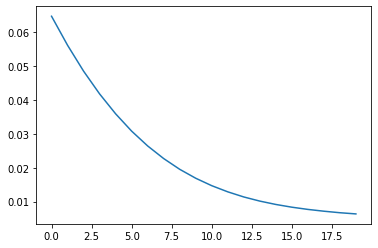

In [10]:
plt.plot(t_loss)

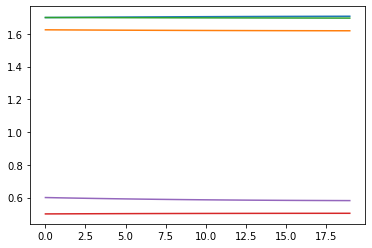

In [12]:
plt.plot(t_params)

/Users/cholt/miniconda3/envs/juC/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


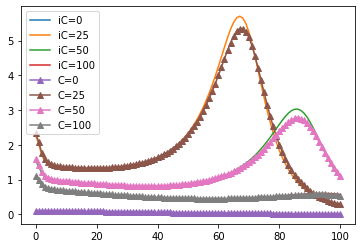

In [15]:
r1, _ = r_SS(params)
spect = np.real(PS(params, r1))

plt.plot(fs, ideal_spect, fs, spect, '-^')
plt.legend(['iC=0', 'iC=25', 'iC=50', 'iC=100', 'C=0', 'C=25', 'C=50', 'C=100'])

In [5]:
def rate_powerLaw(rr, W, I_total, kk ,nn):
    fr = kk * np.maximum(W @ rr + I_total, np.zeros_like(I_total)) ** 2
    return fr

def drdt(rr, W, I_total, kk, nn, tau):
    '''Evaluates the RHS of the r-eqn --- Does not include dt '''
    delta_r = (1/tau) * (-rr + rate_powerLaw(rr, W, I_total, kk ,nn))
    return delta_r

N = 2
rcpt_types = 1
t = np.arange(0,5000.1, 0.1)
fs = np.arange(0, 101, 1)
fs = fs/1000 #convert from Hz to kHz
c = np.array([0, 25, 50, 100])
cons = len(c)

J0 = np.array([[Jee, -Jei], [Jie, -Jii]])

W = J0
#     print('Det(W) =', '%.3f' % np.linalg.det(W))

#define nonlinearity parameters
kk = 0.04
nn = 2

if rcpt_types > 1:
    g = np.array([1, i2e, 0, 0, 0, 0])
else:
    g = np.array([1, i2e])

tauE = 20.
tau_ratio = 2.
tauI = tauE/tau_ratio
tau = np.array([tauE, tauI])

t_scale = 1
tauNMDA = 100 * t_scale
tauAMPA = 3 * t_scale
tauGABA = 5 * t_scale
nmdaRatio = 0.1 # sets the ratio of NMDA cells to AMPA cell

if rcpt_types > 1:
    tauS = np.array([tauAMPA, tauNMDA, tauGABA])
    tauSvec = np.kron(tauS, np.ones(N))

    Wtot = np.array([[(1-nmdaRatio)*Jee, 0, 0, 0, 0, 0], [(1-nmdaRatio)* Jie, 0, 0, 0, 0, 0], [0, 0, nmdaRatio * Jee, 0, 0, 0], [0, 0, nmdaRatio * Jie, 0, 0, 0], [0, 0, 0, 0, 0, -Jei], [0, 0, 0, 0, 0, -Jii]])

else:
    tauSvec = tau
    Wrcpt = W
    Wtot = W

r1 = np.zeros([N, cons])
r_t = []
r_starcons = np.zeros([N, cons])

I_total = np.kron( g.reshape(N*rcpt_types,1),  c.reshape(1,cons))
#Conv = 
True
indt = 0

xtol = 1e-3
xmin = 1

r1 = np.zeros([N, cons])
r_t = []
r_starcons = np.zeros([N, cons])

I_total = np.kron( g.reshape(N*rcpt_types,1),  c.reshape(1,cons))

In [15]:
np.reshape((1/tau), (N,1))*(-r1 + rate_powerLaw(r1, Wtot, I_total,kk,nn))

array([[ 0.  ,  1.25,  5.  , 20.  ],
       [ 0.  ,  0.9 ,  3.6 , 14.4 ]])

In [4]:
kk =0.04
nn = 2

rs = nn*kk**(1/nn)*r1**(1-1/nn)

In [6]:
rs.shape[0]

2